<a href="https://colab.research.google.com/github/vasudevan-gomathy/CaseStudy_ForensicScienceService/blob/main/CaseStudy_ForensicScienceService.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Study - Forensic Science Service

**Importing the Libraries**

In [74]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from scipy.spatial import distance
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt

**Importing the Dataset**

In [75]:
columns  = ['Id number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass']
df = pd.read_csv('/content/trainKNN.txt', names = columns)
test = pd.read_csv('/content/testKNN.txt', names = columns)

**Exploratory Data Analysis**

In [76]:
test.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,68,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.0,0.17,1
1,69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16,1
2,70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.0,0.03,1
3,144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.0,0.00,2
4,145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.0,0.24,2


In [77]:
df.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [78]:
df.shape

(196, 11)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id number      196 non-null    int64  
 1   RI             196 non-null    float64
 2   Na             196 non-null    float64
 3   Mg             196 non-null    float64
 4   Al             196 non-null    float64
 5   Si             196 non-null    float64
 6   K              196 non-null    float64
 7   Ca             196 non-null    float64
 8   Ba             196 non-null    float64
 9   Fe             196 non-null    float64
 10  Type of glass  196 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 17.0 KB


In [80]:
df.describe()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,102.862245,1.518295,13.375204,2.758980,1.454337,72.635408,0.519388,8.910714,0.164235,0.050255,2.668367
std,61.195663,0.003055,0.783145,1.392641,0.491688,0.763578,0.672703,1.421490,0.485198,0.086359,2.062416
min,1.000000,1.511310,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,49.750000,1.516458,12.877500,2.362500,1.190000,72.317500,0.140000,8.220000,0.000000,0.000000,1.000000
50%,101.500000,1.517630,13.280000,3.480000,1.360000,72.810000,0.560000,8.575000,0.000000,0.000000,2.000000
75%,153.250000,1.518985,13.792500,3.610000,1.622500,73.080000,0.610000,9.092500,0.000000,0.090000,3.000000
max,211.000000,1.533930,15.790000,4.490000,3.500000,75.180000,6.210000,16.190000,3.150000,0.340000,7.000000


In [81]:
df['Type of glass'].unique()

array([1, 2, 3, 5, 6, 7])

In [82]:
df['Type of glass'].value_counts()

2    73
1    67
7    26
3    14
5    10
6     6
Name: Type of glass, dtype: int64

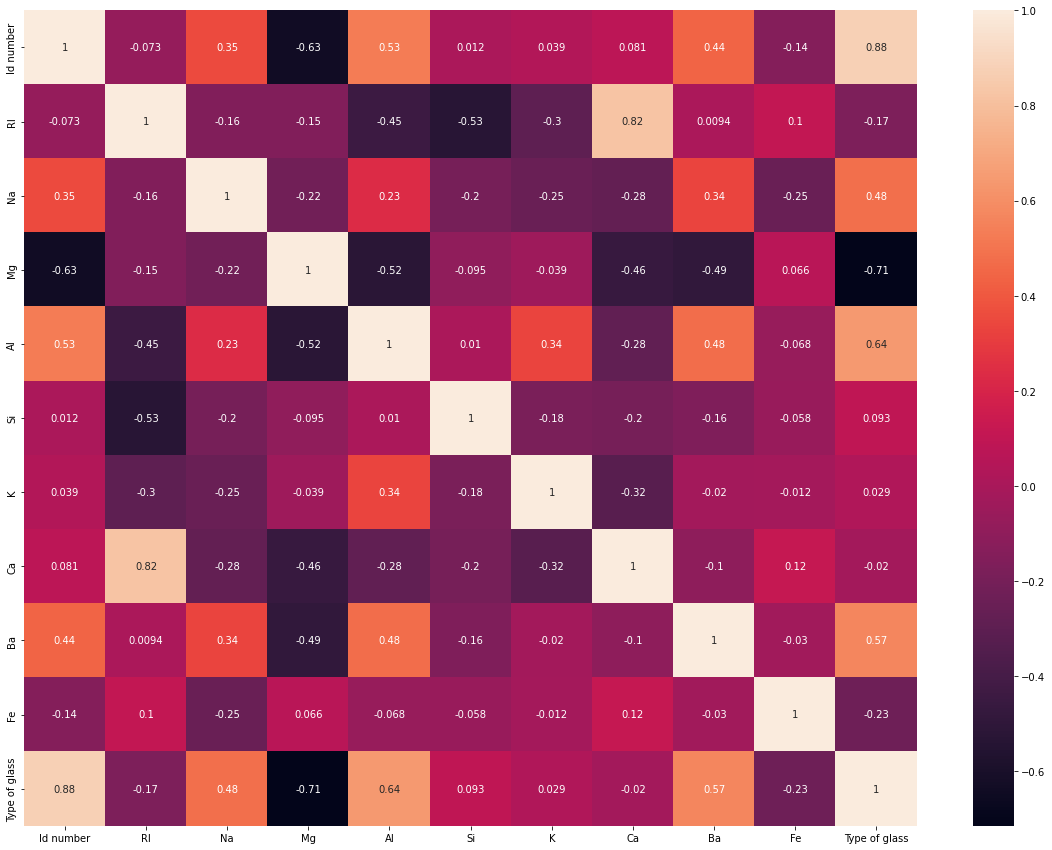

In [83]:
corr = df.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr, annot=True)

**Splitting and Scaling**

In [84]:
X_train = df.iloc[:,1:10]
y_train = df['Type of glass']
X_test = test.iloc[:,1:10]
y_test = test['Type of glass']

In [85]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Fitting KNN with Training Set**

In [86]:
knn_euc = KNeighborsClassifier(n_neighbors=14, metric=distance.sqeuclidean)
knn_man = KNeighborsClassifier(n_neighbors=14, metric=distance.cityblock)

**Model with Euclidean Distance**

In [87]:
model_euc = knn_euc.fit(X_train, y_train)

**Model with Manhattan Distance**

In [88]:
model_man = knn_man.fit(X_train, y_train)

**Evaluating the Models**

In [89]:
manhattan_predictions = model_man.predict(X_test)
euclid_predictions = model_euc.predict(X_test) 
df = pd.DataFrame({'actual': y_test, 'manhattan': manhattan_predictions, 'euclid': euclid_predictions})
df.head()

,actual,manhattan,euclid
0,1,1,1
1,1,1,1
2,1,1,1
3,2,2,2
4,2,1,1


In [90]:
manhattan_count = len(df.loc[df['manhattan'] == df['actual']])
euclid_count = len(df.loc[df['euclid'] == df['actual']])
print('Manhattan Accuracy: {}%'.format(round(100*manhattan_count/len(df), 2)))
print(classification_report(y_test, y_pred_euc, target_names=df['actual'].astype(str).unique()))
print ('\n')
print('Square Euclidean Accuracy: {}%'.format(round(100*euclid_count/len(df), 2)))
print(classification_report(y_test, y_pred_euc, target_names=df['actual'].astype(str).unique()))

Manhattan Accuracy: 55.56%
              precision    recall  f1-score   support

           1       0.75      1.00      0.86         3
           2       0.25      0.67      0.36         3
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       1.00      0.33      0.50         3
           7       0.60      1.00      0.75         3

    accuracy                           0.50        18
   macro avg       0.43      0.50      0.41        18
weighted avg       0.43      0.50      0.41        18



Square Euclidean Accuracy: 50.0%
              precision    recall  f1-score   support

           1       0.75      1.00      0.86         3
           2       0.25      0.67      0.36         3
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       1.00      0.33      0.50         3
           7       0.60      1.00      0.75         3

    accuracy   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat